# Counting missing rows with left join

The Movie Database is supported by volunteers going out into the world, collecting data, and entering it into the database. This includes financial data, such as movie budget and revenue. If you wanted to know which movies are still missing data, you could use a left join to identify them. Practice using a left join by merging the movies table and the financials table.

The movies and financials tables have been loaded for you.

* Count the number of rows in movies_financials with a null value in the budget column.

In [1]:
import pandas as pd

movies = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv", index_col=0)
movies.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
import numpy as np

# Generate random budgets for each row (between 1 million and 100 million for example)
np.random.seed(42)  # For reproducibility
movies['budget'] = np.random.randint(1_000_000, 100_000_000, size=len(movies))

# Create a new DataFrame with show_id and budget
financials = movies[['budget']].copy()

# Save the new CSV
financials.to_csv('/kaggle/working/financials.csv', index=True)

# Display the first few rows of the new financials table
financials.head()

,budget
show_id,
s1,66682867
s2,57755036
s3,57882282
s4,22081788
s5,14315092


In [9]:
movies = movies.drop(columns=['budget'])

# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='show_id', how='left')
movies_financials.head()



,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,budget
show_id,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",66682867
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",57755036
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,57882282
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",22081788
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,14315092


In [13]:
# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isnull().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

0


Great job! You used a left join to find out which rows in the financials table were missing data. When performing a left join, the .merge() method returns a row full of null values for columns in the right table if the key column does not have a matching value in both tables. We see that there are at least 1,500 rows missing data. Wow! That sounds like a lot of work.

**Enriching a dataset**

Setting how='left' with the .merge()method is a useful technique for enriching or enhancing a dataset with additional information from a different table. In this exercise, you will start off with a sample of movie data from the movie series Toy Story. Your goal is to enrich this data by adding the marketing tag line for each movie. You will compare the results of a left join versus an inner join.

The toy_story DataFrame contains the Toy Story movies. The toy_story and taglines DataFrames have been loaded for you.


* Merge toy_story and taglines on the id column with a left join, and save the result as toystory_tag.
* With toy_story as the left table, merge to it taglines on the id column with an inner join, and save as toystory_tag.

In [ ]:
# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines, on ="id", how = "left")

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

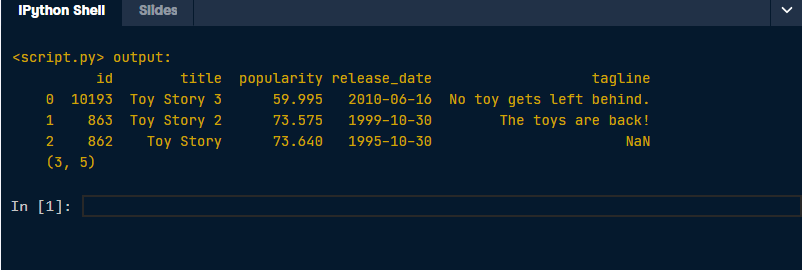

In [ ]:
# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, on = "id")

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

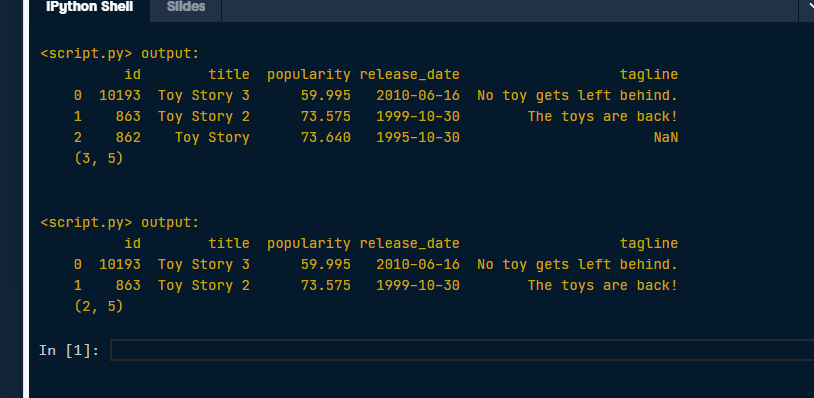

That's fantastic work! If your goal is to enhance or enrich a dataset, then you do not want to lose any of your original data. A left join will do that by returning all of the rows of your left table, while using an inner join may result in lost data if it does not exist in both tables.

**A left join will return all of the rows from the left table. If those rows in the left table match multiple rows in the right table, then all of those rows will be returned. Therefore, the returned rows must be equal to if not greater than the left table. Knowing what to expect is useful in troubleshooting any suspicious merges.**